In [68]:
import requests
import pandas as pd
import numpy as np
import time

from tqdm import tqdm

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (15, 5)
plt.style.use('bmh')
%matplotlib inline


In [8]:
all_votes = pd.read_hdf('./all/all_of_them_clean.h5')
kad8 = pd.read_hdf('./all/kad8.h5')

In [9]:
kad8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3702730 entries, 2888640 to 6591369
Data columns (total 8 columns):
kadencja          float64
partia            object
osoba             object
glos              object
nr_posiedzenia    float64
nr_glos           float64
opis              object
timestamp         datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 254.2+ MB


In [13]:
all_votes['kadencja'].value_counts()

8.0    3702730
7.0    2888640
9.0      23000
Name: kadencja, dtype: int64

In [ ]:
all_votes['kadencja'].value_counts()

In [17]:
all_votes.head()

,kadencja,partia,osoba,glos,nr_posiedzenia,nr_glos,opis,timestamp
0,7.0,PO,Achinger Elżbieta,Nieobecny,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
1,7.0,PO,Arkit Tadeusz,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
2,7.0,PO,Arłukowicz Bartosz,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
3,7.0,PO,Arndt Paweł,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44
4,7.0,PO,Augustyn Urszula,Przeciw,102.0,1.0,102 posiedzenie Sejmu Rzeczypospolitej Polskie...,2015-10-08 09:06:44


# rozkład głosowań w miesiącach kolejnych lat

In [18]:
all_votes['timestamp'].groupby([all_votes['timestamp'].dt.year, all_votes['timestamp'].dt.month]).count()

timestamp  timestamp
2011       11            17464
           12            17451
2012       1            114540
           2              2760
           3             57040
           4             32660
           5             58420
           6             35880
           7             28520
           8              9200
           9             19320
           10            54740
           11            63940
           12           165600
2013       1             32660
           2             14720
           3             40480
           4             67160
           5             40480
           6             65780
           7             70840
           8             39015
           9             54740
           10            50600
           11            54740
           12           120520
2014       1             51060
           2             31740
           3             50515
           4             55131
                         ...  
2017       4      

In [19]:
aa = all_votes['timestamp'].groupby([all_votes['timestamp'].dt.year, all_votes['timestamp'].dt.month]).count()

In [21]:
type(aa)

pandas.core.series.Series

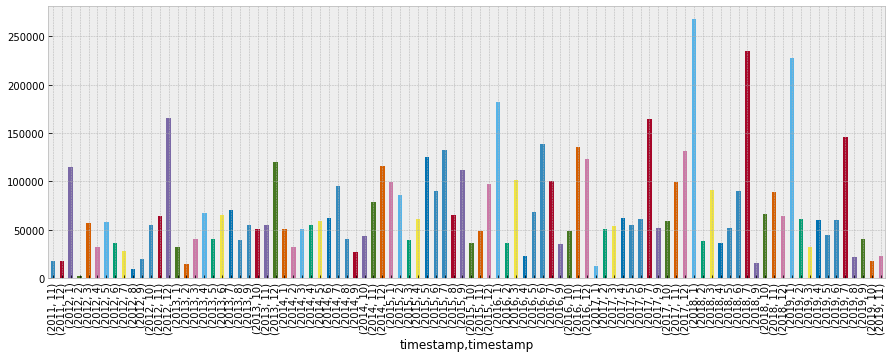

In [24]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
aa.plot.bar()

# Ilość głosowań w poszczególnych latach

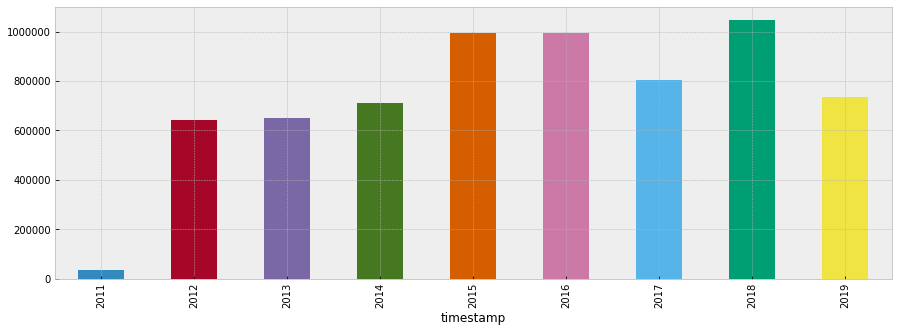

In [25]:
all_votes['timestamp'].groupby([all_votes['timestamp'].dt.year]).count().plot.bar()

# Ilość głosowań w poszczególnych godzinach

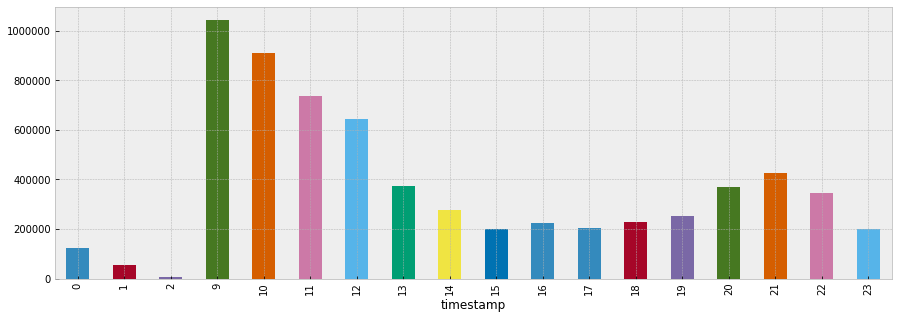

In [27]:
all_votes['timestamp'].groupby([ all_votes['timestamp'].dt.hour]).count().plot.bar()

## Kolumny pomocnicze

In [56]:
all_votes['day_of_week'] = all_votes['timestamp'].map(lambda x: x.weekday() )

In [57]:
all_votes['hour'] = all_votes['timestamp'].map(lambda x: x.hour )

In [58]:
all_votes['year'] = all_votes['timestamp'].map(lambda x: x.year )

# Głosowania w poszczególnych dniach tygodnia poszczególnych lat

In [59]:
df = all_votes[['day_of_week', 'year', 'timestamp']].groupby(['day_of_week', 'year']).count()
m = df.unstack()
m

timestamp                                                    \
year             2011      2012      2013      2014      2015      2016   
day_of_week                                                               
0                 NaN       NaN       NaN       NaN    5056.0   18860.0   
1              3664.0    6440.0   10116.0   41338.0   53358.0   49676.0   
2              2295.0  163300.0   27598.0   96899.0  172890.0  241461.0   
3             17475.0   34960.0   73140.0   75426.0  277209.0  270413.0   
4              8721.0  437920.0  540881.0  497377.0  486473.0  412988.0   
5              2760.0       NaN       NaN       NaN       NaN       NaN   

                                           
year             2017      2018      2019  
day_of_week                                
0                 NaN       NaN       NaN  
1             36340.0  145198.0   10580.0  
2             55660.0   96997.0  311370.0  
3            327434.0  522258.0  270814.0  
4            384560.0  281865.0  142600.0  
5                 NaN       NaN       NaN

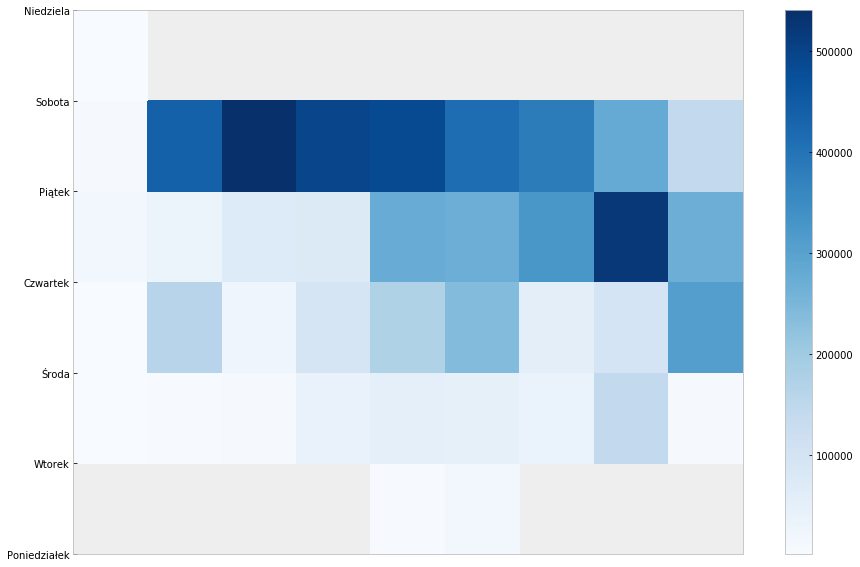

In [75]:
# plot a heat map
plt.figure(figsize=(15, 10))
y = np.array([0,1,2,3,4,5,6,7])
x = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
my_yticks = ['Poniedziałek','Wtorek','Środa','Czwartek','Piątek','Sobota','Niedziela','']
my_xticks = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '']
plt.yticks(y, my_yticks)
plt.xticks(x, my_xticks)
plt.pcolor(m, cmap='Blues')
plt.colorbar()
plt.show()

# Głosowania w poszczególnych godzinach poszczególnych lat

In [76]:
df = all_votes[['hour', 'year', 'timestamp']].groupby(['hour', 'year']).count()
h = df.unstack()
h

timestamp                                                             \
year      2011      2012      2013      2014      2015      2016     2017   
hour                                                                        
0          NaN    9200.0       NaN    3178.0    7804.0   67620.0    920.0   
1          NaN       NaN       NaN       NaN     919.0   31740.0      NaN   
2          NaN       NaN       NaN       NaN       NaN    1380.0      NaN   
9      13775.0  129720.0  149937.0  230300.0  250531.0  134298.0  60718.0   
10      5060.0   97060.0   88313.0  169861.0  167832.0   85082.0  98900.0   
11       919.0   41860.0  108984.0   96793.0  102577.0   91054.0  91540.0   
12      9660.0   45080.0  107167.0   30244.0   86940.0   92433.0  73600.0   
13       458.0   40480.0   48756.0   41848.0   40938.0   48735.0  68514.0   
14         NaN   56120.0   12880.0   30358.0   11039.0   37698.0  45050.0   
15       460.0   47380.0   17480.0       NaN   26220.0   12880.0  32200.0   
16       458.0   46000.0   23000.0   13773.0   30794.0   14256.0  21160.0   
17      3667.0   36340.0    5060.0   12854.0   17011.0   21141.0  39100.0   
18       458.0   76360.0     920.0    6431.0   10114.0   25300.0  30350.0   
19         NaN   11500.0       NaN     920.0   29882.0   52882.0  61625.0   
20         NaN    5520.0   29438.0    1380.0   34957.0  109006.0  63477.0   
21         NaN       NaN   40940.0    2270.0  102521.0   94753.0  57500.0   
22         NaN       NaN   18860.0   45406.0   52848.0   36800.0  41400.0   
23         NaN       NaN       NaN   25424.0   22059.0   36340.0  17940.0   

                          
year      2018      2019  
hour                      
0       8280.0   25300.0  
1          NaN   21620.0  
2          NaN    4140.0  
9      72979.0    1380.0  
10    127143.0   68988.0  
11     95038.0  106260.0  
12    106364.0   93380.0  
13     45471.0   37720.0  
14     37235.0   47840.0  
15     45974.0   18400.0  
16     69916.0    3680.0  
17     59328.0   10559.0  
18     60679.0   19303.0  
19     72567.0   21620.0  
20     67972.0   56546.0  
21     43175.0   83684.0  
22     68004.0   82751.0  
23     66193.0   32193.0

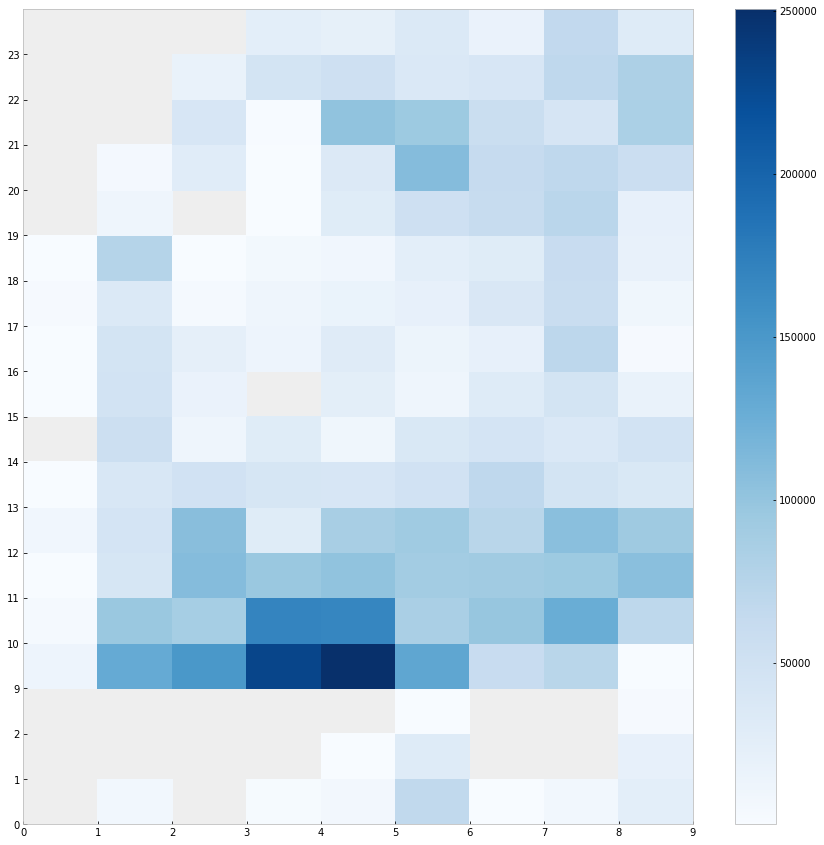

In [85]:
# plot a heat map
plt.figure(figsize=(15, 15))
y = np.array([0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
my_yticks = ['0','1','2','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','']
plt.yticks(y, my_yticks)
plt.pcolor(h, cmap='Blues')
plt.colorbar()
plt.show()

# Rozkład głosów

In [90]:
all_votes['glos'].value_counts()

Przeciw          3044158
Za               2861102
Nieobecny         466193
Wstrzymał się     242917
Name: glos, dtype: int64

## Rozkład głosów w poszczególnych godzinach

In [91]:
all_votes['timestamp'].groupby([all_votes['glos'], all_votes['hour']]).count()

glos           hour
Nieobecny      0         7044
               1         3988
               2          619
               9        63845
               10       64709
               11       52323
               12       48363
               13       29188
               14       21243
               15       16643
               16       15102
               17       14779
               18       13720
               19       20446
               20       30893
               21       29415
               22       22464
               23       11409
Przeciw        0        56207
               1        23902
               2         2883
               9       439279
               10      395122
               11      341610
               12      323213
               13      186245
               14      147830
               15       91127
               16      105682
               17       94117
                        ...  
Wstrzymał się  12       16508
               13   

In [104]:
wyniki = {
    'Nieobecny':[],
    'Przeciw':[], 
    'Wstrzymał się':[], 
    'Za':[]
}

for gl in ['Nieobecny', 'Przeciw', 'Wstrzymał się', 'Za']:
    for hh in range(0,24):
        wyniki[gl].append( all_votes[ (all_votes['hour'] == hh) & (all_votes['glos'] == gl) ].shape[0] ) 
        
wyniki

{'Nieobecny': [7044,
  3988,
  619,
  0,
  0,
  0,
  0,
  0,
  0,
  63845,
  64709,
  52323,
  48363,
  29188,
  21243,
  16643,
  15102,
  14779,
  13720,
  20446,
  30893,
  29415,
  22464,
  11409],
 'Przeciw': [56207,
  23902,
  2883,
  0,
  0,
  0,
  0,
  0,
  0,
  439279,
  395122,
  341610,
  323213,
  186245,
  147830,
  91127,
  105682,
  94117,
  105092,
  94866,
  170291,
  220656,
  164208,
  81828],
 'Wstrzymał się': [6245,
  2430,
  130,
  0,
  0,
  0,
  0,
  0,
  0,
  49972,
  37419,
  28273,
  16508,
  8691,
  7380,
  9908,
  10399,
  7219,
  7578,
  7631,
  10193,
  12815,
  11335,
  8791],
 'Za': [52806,
  23959,
  1888,
  0,
  0,
  0,
  0,
  0,
  0,
  490542,
  410989,
  312819,
  256784,
  148796,
  101767,
  83316,
  91854,
  88945,
  103525,
  128053,
  156919,
  161957,
  148062,
  98121]}

# Rozkład udziału głosów w poszczególnych godzinach

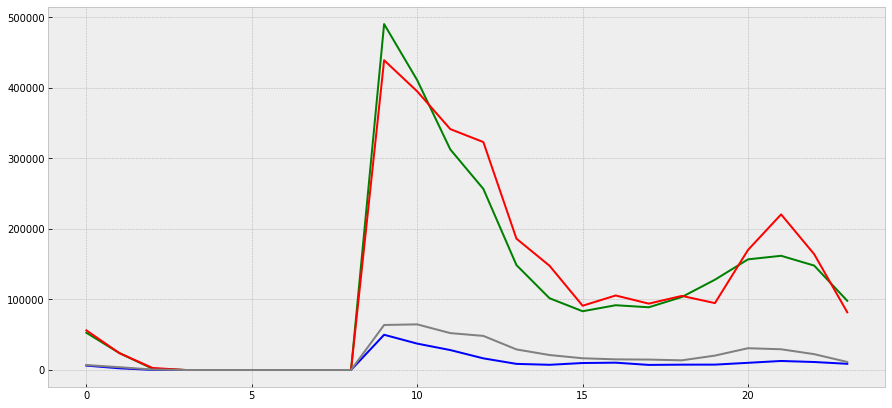

In [111]:
hours = [0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

plt.figure(figsize=(15, 7))
plt.plot(hours, wyniki['Za'], color='green')
plt.plot(hours, wyniki['Przeciw'], color='red')
plt.plot(hours, wyniki['Wstrzymał się'], color='blue')
plt.plot(hours, wyniki['Nieobecny'], color='gray')

In [112]:
wyniki_dow = {
    'Nieobecny':[],
    'Przeciw':[], 
    'Wstrzymał się':[], 
    'Za':[]
}

for gl in ['Nieobecny', 'Przeciw', 'Wstrzymał się', 'Za']:
    for hh in range(0,7):
        wyniki_dow[gl].append( all_votes[ (all_votes['day_of_week'] == hh) & (all_votes['glos'] == gl) ].shape[0] ) 
        
wyniki_dow

{'Nieobecny': [1514, 25665, 83731, 142884, 212287, 112, 0],
 'Przeciw': [8864, 144106, 542289, 870456, 1477953, 490, 0],
 'Wstrzymał się': [232, 11485, 41135, 57315, 132547, 203, 0],
 'Za': [13306, 175454, 501315, 798474, 1370598, 1955, 0]}

# Rozkład udziału głosów w poszczególnych dniach tygodnia

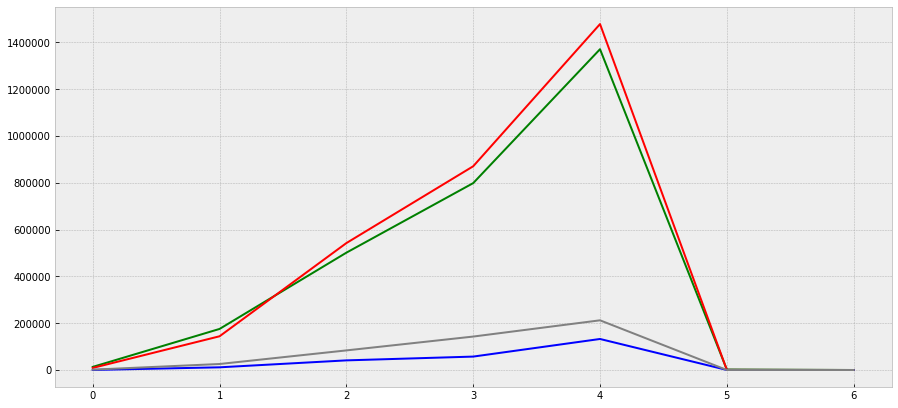

In [114]:
days = [0,1,2,3,4,5,6]

plt.figure(figsize=(15, 7))
plt.plot(days, wyniki_dow['Za'], color='green')
plt.plot(days, wyniki_dow['Przeciw'], color='red')
plt.plot(days, wyniki_dow['Wstrzymał się'], color='blue')
plt.plot(days, wyniki_dow['Nieobecny'], color='gray')

# Rekordziści w nieobecnościach

In [118]:
all_votes[ all_votes['glos'] == 'Nieobecny' ].osoba.value_counts()

Zembala Marian                4300
Górski Artur                  3550
Lipiński Adam                 3336
Pasławska Urszula             2847
Raczak Grzegorz               2818
Morawiecki Kornel             2772
Korzeniowski Leszek           2752
Kłopotek Eugeniusz            2741
Wilk Jacek                    2710
Malik Ewa                     2622
Bukiewicz Bożenna             2607
Kaczyński Jarosław            2578
Jurgiel Krzysztof             2442
Zgorzelski Piotr              2425
Sawicki Marek                 2275
Lenz Tomasz                   2252
Maliszewski Mirosław          2210
Gawłowski Stanisław           2182
Szydło Beata                  2155
Waszczykowski Witold          2134
Kulesza Jakub                 2106
Brudziński Joachim            2103
Jędrysek Mariusz Orion        2099
Jaki Patryk                   2061
Szczypińska Jolanta           2059
Wróblewska Kornelia           2043
Ajchler Zbigniew              2031
Gowin Jarosław                2007
Piątak Andrzej      

In [143]:
nieobecni_partia = all_votes[ all_votes['glos'] == 'Nieobecny' ].partia.value_counts()
za_partia = all_votes[ all_votes['glos'] == 'Za' ].partia.value_counts()
przeciw_partia = all_votes[ all_votes['glos'] == 'Przeciw' ].partia.value_counts()


In [122]:
wszystkie_partia = all_votes.partia.value_counts()

In [129]:
wszystkie_partia['PiS']

2757711

# Udział procentowy nieobecności w głosach

In [142]:
for partia in wszystkie_partia.index:
    perc = nieobecni_partia[partia] / wszystkie_partia[partia]
    perc = perc * 100
    print('nieobecności {:15s} === {:7.2f} z {:7d}'.format(partia, perc, wszystkie_partia[partia]))

nieobecności PiS             ===    5.58 z 2757711
nieobecności PO              ===    5.61 z 2142551
nieobecności PSL             ===   10.25 z  279615
nieobecności Kukiz15         ===   11.58 z  253624
nieobecności PO-KO           ===   10.87 z  248910
nieobecności N               ===   11.95 z  187751
nieobecności SLD             ===    9.56 z  179823
nieobecności niez.           ===   13.93 z  139927
nieobecności RP              ===    7.88 z  114299
nieobecności TR              ===   10.22 z   67592
nieobecności SP              ===    8.84 z   63510
nieobecności PSL-UED         ===   16.97 z   48927
nieobecności WiS             ===   14.07 z   29265
nieobecności ZP              ===    8.63 z   21564
nieobecności KPSP            ===    7.43 z   17433
nieobecności UED             ===   20.00 z   10017
nieobecności PSL-KP          ===   21.14 z    8206
nieobecności KO              ===    3.18 z    6700
nieobecności BiG             ===   13.44 z    6490
nieobecności TERAZ!          ==

## Udział procentowy głosów Za w głosach

In [144]:
for partia in wszystkie_partia.index:
    perc = za_partia[partia] / wszystkie_partia[partia]
    perc = perc * 100
    print('Za {:15s} === {:7.2f} z {:7d}'.format(partia, perc, wszystkie_partia[partia]))

Za PiS             ===   38.63 z 2757711
Za PO              ===   44.35 z 2142551
Za PSL             ===   39.14 z  279615
Za Kukiz15         ===   47.26 z  253624
Za PO-KO           ===   68.13 z  248910
Za N               ===   56.97 z  187751
Za SLD             ===   49.89 z  179823
Za niez.           ===   36.47 z  139927
Za RP              ===   44.55 z  114299
Za TR              ===   41.27 z   67592
Za SP              ===   57.28 z   63510
Za PSL-UED         ===   59.27 z   48927
Za WiS             ===   30.66 z   29265
Za ZP              ===   36.09 z   21564
Za KPSP            ===   44.73 z   17433
Za UED             ===   56.64 z   10017
Za PSL-KP          ===   58.09 z    8206
Za KO              ===   58.57 z    6700
Za BiG             ===   37.83 z    6490
Za TERAZ!          ===   61.36 z    5235
Za Konfederacja    ===   32.68 z    5018
Za BC              ===   37.53 z    3016
Za Republikanie    ===   46.05 z    2847
Za W-S             ===   20.85 z    2643
Za L-S          

## Udział procentowy głosów Przeciw w głosach

In [145]:
for partia in wszystkie_partia.index:
    perc = przeciw_partia[partia] / wszystkie_partia[partia]
    perc = perc * 100
    print('Przeciw {:15s} === {:7.2f} z {:7d}'.format(partia, perc, wszystkie_partia[partia]))

Przeciw PiS             ===   51.69 z 2757711
Przeciw PO              ===   48.74 z 2142551
Przeciw PSL             ===   49.31 z  279615
Przeciw Kukiz15         ===   28.63 z  253624
Przeciw PO-KO           ===   18.45 z  248910
Przeciw N               ===   24.95 z  187751
Przeciw SLD             ===   36.26 z  179823
Przeciw niez.           ===   38.99 z  139927
Przeciw RP              ===   43.46 z  114299
Przeciw TR              ===   43.08 z   67592
Przeciw SP              ===   26.28 z   63510
Przeciw PSL-UED         ===   20.02 z   48927
Przeciw WiS             ===   52.85 z   29265
Przeciw ZP              ===   39.18 z   21564
Przeciw KPSP            ===   32.36 z   17433
Przeciw UED             ===   18.99 z   10017
Przeciw PSL-KP          ===   14.51 z    8206
Przeciw KO              ===   31.90 z    6700
Przeciw BiG             ===   47.26 z    6490
Przeciw TERAZ!          ===   19.43 z    5235
Przeciw Konfederacja    ===   27.48 z    5018
Przeciw BC              ===   42.4

# Praca z opisami

In [156]:
all_votes['opis'][1477228]

'61. posiedzenie Sejmu Rzeczypospolitej Polskiej w dniach 19, 20 i 21 lutego 2014 r. - głosowanie nad ogłoszeniem przerwy'

## Ilość głosów w głosowaniach budżetowych lub związanych z budżetem

In [152]:
all_votes[ all_votes['opis'].str.contains("budż") ].shape

(1019356, 11)

In [153]:
all_votes.shape

(6614370, 11)

## Ilość głosów w głosowaniach na temat przerwy

In [154]:
all_votes[ all_votes['opis'].str.contains("przerw") ].shape

(111264, 11)

## Rozkład głosów w głosowaniach na temat przerwy

In [157]:
all_votes[ all_votes['opis'].str.contains("przerw") ]['glos'].value_counts()

Przeciw          60720
Za               40192
Nieobecny         9601
Wstrzymał się      751
Name: glos, dtype: int64

In [158]:
przerwy = all_votes[ all_votes['opis'].str.contains("przerw") ]

In [161]:
przerwy[ (przerwy['glos'] == 'Za') | (przerwy['glos'] == 'Przeciw') ]['timestamp'].groupby([przerwy['partia'], przerwy['glos'] ]).count()

partia        glos   
BiG           Przeciw       15
              Za             8
ED            Przeciw        1
              Za            24
ID            Przeciw       44
              Za            28
KO            Przeciw      129
              Za           129
KPSP          Przeciw       30
              Za           140
Konfederacja  Przeciw       12
              Za            47
Kukiz15       Przeciw     1737
              Za          1085
L-S           Za            21
Lewica        Przeciw       49
              Za            47
N             Przeciw       23
              Za          2472
PO            Przeciw    23497
              Za         12653
PO-KO         Przeciw        8
              Za          1839
PP            Za             2
PSL           Przeciw     3185
              Za          1059
PSL-KP        Przeciw        1
              Za            40
PSL-Kukiz15   Przeciw       22
              Za            26
PSL-UED       Przeciw        7
              Za 

In [163]:
przerwy_only = all_votes[ all_votes['opis'].str.contains("przerw") ]
przerwy_only.shape

(111264, 11)

In [ ]:
wyniki_przerwa = {
    'Nieobecny':[],
    'Przeciw':[], 
    'Wstrzymał się':[], 
    'Za':[]
}

for gl in ['Nieobecny', 'Przeciw', 'Wstrzymał się', 'Za']:
    for hh in range(0,24):
        wyniki_przerwa[gl].append( przerwy_only[ (all_votes['hour'] == hh) & (przerwy_only['glos'] == gl) ].shape[0] ) 
        
wyniki_przerwa

/home/pawel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/pawel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/pawel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/pawel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/pawel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from 

In [ ]:
hours = [0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

plt.figure(figsize=(15, 7))
plt.plot(hours, wyniki_przerwa['Za'], color='green')
plt.plot(hours, wyniki_przerwa['Przeciw'], color='red')
plt.plot(hours, wyniki_przerwa['Wstrzymał się'], color='blue')
plt.plot(hours, wyniki_przerwa['Nieobecny'], color='gray')